### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

### Loading car advertisement dataset

In [2]:
df = pd.read_csv('car_ad.csv', sep=',',encoding='latin-1')
df

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class    NaN  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9576 rows x 10 columns]

### Data Understanding 

In [3]:
df.head()

car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class    NaN

In [4]:
df.tail()

car    price       body  mileage  engV engType registration  \
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full

In [5]:
df.shape

(9576, 10)

In [6]:
#checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [7]:
df.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [8]:
df.describe()

price      mileage         engV         year
count    9576.000000  9576.000000  9142.000000  9576.000000
mean    15633.317316   138.862364     2.646344  2006.605994
std     24106.523436    98.629754     5.927699     7.067924
min         0.000000     0.000000     0.100000  1953.000000
25%      4999.000000    70.000000     1.600000  2004.000000
50%      9200.000000   128.000000     2.000000  2008.000000
75%     16700.000000   194.000000     2.500000  2012.000000
max    547800.000000   999.000000    99.990000  2016.000000

* all numeric columns having count 9576 except engV. Looks like this column has some missing values

* price and mileage has min value as Zero which is not possible. We need to look into to replace them as NaN to make them null values

In [9]:
import pandas as pd
from pandas_profiling import ProfileReport
df = pd.read_csv('car_ad.csv', sep=',',encoding='latin-1')
profile = ProfileReport(df)
profile.to_file('report.html')

C:\Users\lavender\AppData\Local\Temp\ipykernel_14872\2916253624.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Checking for duplicates

In [10]:
# A function to check for duplicates in our datasets
def check_duplicates(df):
    
    duplicates = df[df.duplicated()]
    if duplicates.shape[0] == 0:
        print("No duplicates found in the dataset")
    else:
        print("Duplicates found in the dataset:")
        return duplicates
# Calling for the function to check for duplicates
check_duplicates(df)

Duplicates found in the dataset:


car     price       body  mileage  engV engType registration  \
18           Nissan   16600.0  crossover       83   2.0  Petrol          yes   
42    Mercedes-Benz   20400.0      sedan      190   1.8     Gas          yes   
70    Mercedes-Benz       0.0  crossover        0   3.0  Diesel          yes   
86           Toyota  103999.0  crossover        0   4.5  Diesel          yes   
98    Mercedes-Benz   20400.0      sedan      190   1.8     Gas          yes   
...             ...       ...        ...      ...   ...     ...          ...   
9156     Volkswagen   15700.0      sedan      110   1.8  Petrol          yes   
9163  Mercedes-Benz   20500.0      sedan      222   5.5  Petrol          yes   
9164            VAZ    3900.0      hatch      121   1.4  Petrol          yes   
9169        Hyundai   12900.0  crossover       49   2.7  Petrol          yes   
9477            BMW   77777.0      sedan        8   4.4  Petrol          yes   

      year             model  drive  
18    2013           X-Trail   full  
42    2011           E-Class   rear  
70    2016         GLE-Class   full  
86    2016  Land Cruiser 200   full  
98    2011           E-Class   rear  
...    ...               ...    ...  
9156  2011         Passat B7  front  
9163  2006             S 500   rear  
9164  2008              1119  front  
9169  2008            Tucson   full  
9477  2014               750   full  

[113 rows x 10 columns]

there are 113 duplicate rows in dataset, we have to remove those first.

In [11]:
df.drop_duplicates(inplace=True) 

In [12]:
check_duplicates(df)

No duplicates found in the dataset


### Checking for missing values

In [13]:
# A function to check for missing values in our dataset
def check_missing_values(data):
    # Count missing values in each column
    missing_values = data.isnull().sum()

    # Convert missing values count to percentage of total rows
    missing_percent = (missing_values / len(data)) * 100

    # Combine the missing values count and percent into a DataFrame
    missing_df = pd.concat([missing_values, missing_percent], axis=1)
    missing_df.columns = ['Missing Values', '% of Total']
# Return only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]

    return missing_df

# Check missing values in each dataset
display(check_missing_values(df))

Missing Values  % of Total
engV              434    4.586283
drive             510    5.389411

In [14]:
df.replace({'engType': 'Other', 'price': 0, 'mileage': 0}, np.nan, inplace=True)
df

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon     91.0   NaN     NaN          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover    140.0   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon    150.0   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover    180.0   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan    150.0   3.5     Gas          yes   
9575           Audi  22500.0      other     71.0   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class    NaN  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9463 rows x 10 columns]

### Feature engineering  in numerical columns

In [15]:
def get_median_price(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif df.groupby(['car'])['price'].count()[brand] > 0:
        brand_median = df.groupby(['car'])['price'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'price' feature. 
        return df['price'].median() # Otherwise return dataset's median for the 'price' feature.
    
price_median = df.groupby(['car','model'])['price'].apply(get_median_price).reset_index()
price_median.rename(columns={'price': 'price_med'}, inplace=True)
price_median.head()

car model  price_med
0  Acura   MDX    17200.0
1  Acura    RL    13950.0
2  Acura    TL     8699.0
3  Acura   TLX    38200.0
4  Acura   ZDX    30999.0

#### handling missing value in price column

In [16]:
def fill_with_median(x):
    if pd.isnull(x['price']):
        return price_median[(price_median['car'] == x['car']) & (price_median['model'] == x['model'])]['price_med'].values[0]
    else:
        return x['price']
    
df['price'] = df.apply(fill_with_median, axis=1)
df

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon     91.0   NaN     NaN          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover    140.0   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon    150.0   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover    180.0   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan    150.0   3.5     Gas          yes   
9575           Audi  22500.0      other     71.0   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class    NaN  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9463 rows x 10 columns]

engV:

* Replacing missing values now for engV column based on [car,model] group product and median value of engV based on this group.

In [17]:
def get_median_engV(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif df.groupby(['car'])['engV'].count()[brand] > 0:
        brand_median = df.groupby(['car'])['engV'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'engV' feature. 
        return df['engV'].median() # Otherwise return dataset's median for the 'engV' feature.
    
engV_median = df.groupby(['car','model'])['engV'].apply(get_median_engV).reset_index()
engV_median.rename(columns={'engV': 'engV_med'}, inplace=True)
engV_median.head()

car model  engV_med
0  Acura   MDX       3.7
1  Acura    RL       3.5
2  Acura    TL       3.2
3  Acura   TLX       2.4
4  Acura   ZDX       3.7

#### handling missing values in engV_med

In [18]:
def fill_with_median(x):
    if pd.isnull(x['engV']):
        return engV_median[(engV_median['car'] == x['car']) & (engV_median['model'] == x['model'])]['engV_med'].values[0]
    else:
        return x['engV']
    
df['engV'] = df.apply(fill_with_median, axis=1)
df

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon     91.0   2.6     NaN          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover    140.0   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon    150.0   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover    180.0   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan    150.0   3.5     Gas          yes   
9575           Audi  22500.0      other     71.0   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class    NaN  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9463 rows x 10 columns]

mileage:
* Replacing missing values now for mileage column based on [car,model,year] group product and median value of mileage based on this group. Year has been included here as per data observations year to year mileage is getting down for the same Car/Brand combination.

In [19]:
def get_median_mileage(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif df.groupby(['car'])['mileage'].count()[brand] > 0:
        brand_median = df.groupby(['car'])['mileage'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'mileage' feature. 
        return carsale['mileage'].median() # Otherwise return dataset's median for the 'mileage' feature.
    
mileage_median = df.groupby(['car','model'])['mileage'].apply(get_median_mileage).reset_index()
mileage_median.rename(columns={'mileage': 'mileage_med'}, inplace=True)
mileage_median.head()

car model  mileage_med
0  Acura   MDX         85.0
1  Acura    RL        138.0
2  Acura    TL        145.0
3  Acura   TLX          4.0
4  Acura   ZDX         32.0

#### handling missing values in mileage_med column

In [20]:
def fill_with_median(x):
    if pd.isnull(x['mileage']):
        return mileage_median[(mileage_median['car'] == x['car']) & (mileage_median['model'] == x['model'])]['mileage_med'].values[0]
    else:
        return x['mileage']
    
df['mileage'] = df.apply(fill_with_median, axis=1)
df

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon     91.0   2.6     NaN          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover    140.0   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon    150.0   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover    180.0   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan    150.0   3.5     Gas          yes   
9575           Audi  22500.0      other     71.0   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class    NaN  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9463 rows x 10 columns]

### Feature engineering in categorical columns

drive:

* Replacing missing values now for drive column based on [car,model] group product and mode value of drive based on this group.

In [21]:
def get_drive_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode() # Return mode for a brand/model if the mode exists.
    elif df.groupby(['car'])['drive'].count()[brand] > 0:
        brand_mode = df.groupby(['car'])['drive'].apply(lambda x: x.mode())[brand]
        return brand_mode # Return mode of brand if particular brand/model combo has no mode,
    else:                 # but brand itself has a mode for the 'drive' feature. 
        return df['drive'].mode() # Otherwise return dataset's mode for the 'drive' feature.
    
drive_modes =df.groupby(['car','model'])['drive'].apply(get_drive_mode).reset_index().drop('level_2', axis=1)
drive_modes.rename(columns={'drive': 'drive_mode'}, inplace=True)
drive_modes.head()

car model drive_mode
0  Acura   MDX       full
1  Acura    RL       full
2  Acura    TL      front
3  Acura   TLX      front
4  Acura   ZDX       full

#### handling missing values in drive column

In [22]:
def fill_with_mode(x):
    if pd.isnull(x['drive']):
        return drive_modes[(drive_modes['car'] == x['car']) & (drive_modes['model'] == x['model'])]['drive_mode'].values[0]
    else:
        return x['drive']
    
df['drive'] = df.apply(fill_with_mode, axis=1)
df

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon     91.0   2.6     NaN          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover    140.0   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon    150.0   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover    180.0   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan    150.0   3.5     Gas          yes   
9575           Audi  22500.0      other     71.0   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class   rear  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9463 rows x 10 columns]

engType: 

* Replacing missing values now for engType column based on [car,model] group product and mode value of engType based on this group.

In [23]:
def get_engType_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode() # Return mode for a brand/model if the mode exists.
    elif df.groupby(['car'])['engType'].count()[brand] > 0:
        brand_mode = df.groupby(['car'])['engType'].apply(lambda x: x.mode())[brand]
        return brand_mode # Return mode of brand if particular brand/model combo has no mode,
    else:                 # but brand itself has a mode for the 'engType' feature. 
        return df['engType'].mode() # Otherwise return dataset's mode for the 'engType' feature.
    
engType_modes = df.groupby(['car','model'])['engType'].apply(get_engType_mode).reset_index().drop('level_2', axis=1)
engType_modes.rename(columns={'engType': 'engType_mode'}, inplace=True)
engType_modes.head()

car model engType_mode
0  Acura   MDX       Petrol
1  Acura    RL          Gas
2  Acura    TL          Gas
3  Acura   TLX       Petrol
4  Acura   ZDX       Petrol

#### handling missing values

In [24]:
def fill_with_mode(x):
    if pd.isnull(x['engType']):
        return engType_modes[(engType_modes['car'] == x['car']) & (engType_modes['model'] == x['model'])]['engType_mode'].values[0]
    else:
        return x['engType']
    
df['engType'] = df.apply(fill_with_mode, axis=1)
df

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon     91.0   2.6  Diesel          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover    140.0   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon    150.0   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover    180.0   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan    150.0   3.5     Gas          yes   
9575           Audi  22500.0      other     71.0   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class   rear  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9463 rows x 10 columns]

Now lets see if still we have missing data in dataset. If not, then we are good to go with plotting

In [25]:
df.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

### EDA

Create a class named EDA that encapsulates various methods for exploratory data analysis.

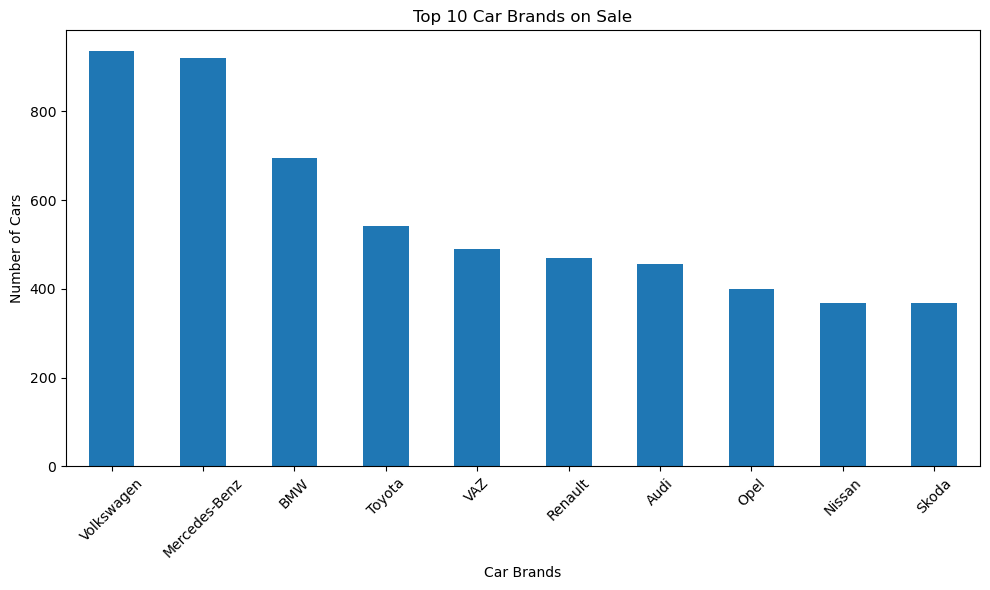

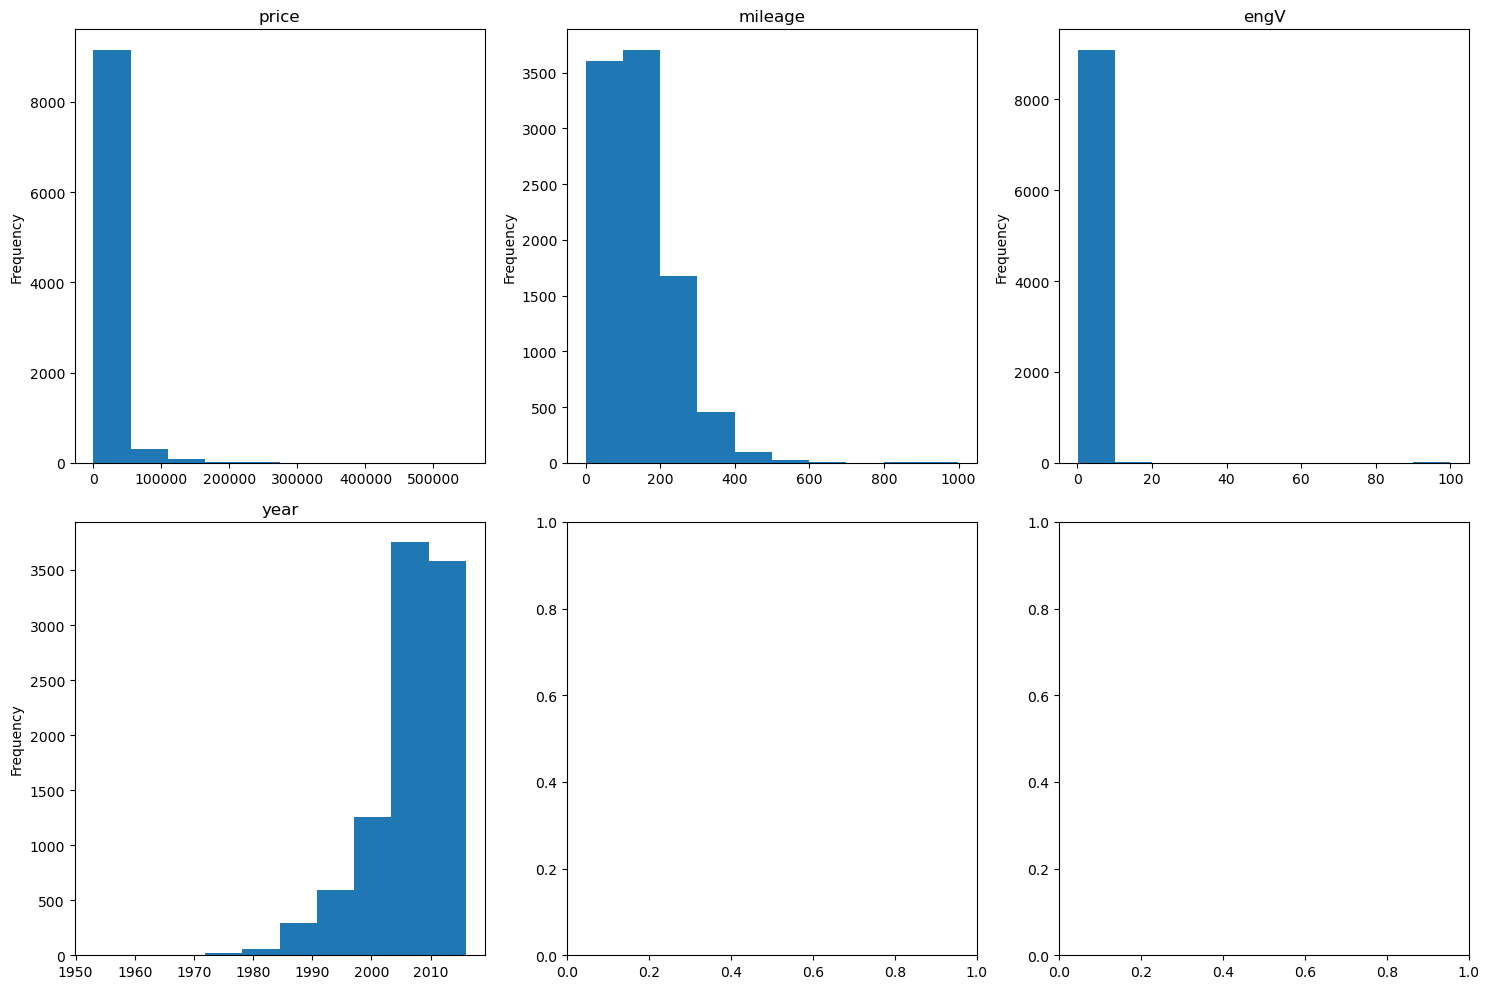

In [26]:
class EDA:
    def __init__(self, dataframe):
        self.df = dataframe
    
    def top_car_brands_bar(self, top_n=10):
        plt.figure(figsize=(10, 6))
        self.df.car.value_counts().head(top_n).plot.bar()
        plt.title(f"Top {top_n} Car Brands on Sale")
        plt.xlabel("Car Brands")
        plt.ylabel("Number of Cars")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    def numerical_histograms(self):
        numerical_cols = self.df.select_dtypes(include=['int64','float64']).columns
        num_cols_count = len(numerical_cols)
        num_cols_per_row = 3
        num_rows = (num_cols_count + num_cols_per_row - 1) // num_cols_per_row

        fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5 * num_rows))
        for i, col in enumerate(numerical_cols):
            ax = axes[i // num_cols_per_row, i % num_cols_per_row]
            self.df[col].plot(kind='hist', ax=ax, title=col)
        plt.tight_layout()
        plt.show()

# Read the CSV file into a DataFrame
df = pd.read_csv('car_ad.csv', sep=',', encoding='latin-1')

# Create an instance of the EDA class
eda = EDA(df)

# Call methods for exploratory data analysis
eda.top_car_brands_bar()
eda.numerical_histograms()


Observations

* This shows Volkswagen and Mercedes-Benz are top most brands on sale and hence these would be preferred choices for high profile people.
* price,mileage and engV graph are skewed to the right while year is skewed towards the left

In [27]:
df[df.price.isin(df.price.nlargest())].sort_values(['car','model','body'])

car     price       body  mileage  engV engType registration  \
1611        Bentley  499999.0  crossover        0  6.00  Petrol          yes   
4134        Bentley  449999.0  crossover        0  6.00  Petrol          yes   
7914        Bentley  499999.0  crossover        0  6.00  Petrol          yes   
7621        Bentley  547800.0      sedan        0  6.75  Petrol          yes   
5849  Mercedes-Benz  300000.0      other       37  5.00  Petrol          yes   
4325  Mercedes-Benz  300000.0      sedan       68  6.00  Petrol          yes   

      year     model drive  
1611  2016  Bentayga  full  
4134  2016  Bentayga  full  
7914  2016  Bentayga  full  
7621  2016  Mulsanne  rear  
5849  2012     G 500  full  
4325  2011     S 600   NaN

* This shows top 5 highest price selling car and their models details can be used for email marketing for high profile income group peoples to achieve sales goals

In [28]:
df[df.price.isin(df.price.nsmallest())].sort_values(['car','model','body'])

car  price       body  mileage  engV engType registration  year  \
3963        Audi    0.0      hatch      243   2.0     Gas          yes  1987   
5042        Audi    0.0      sedan      177   1.8  Petrol          yes  1998   
244         Audi    0.0  crossover       65   3.0  Diesel          yes  2013   
5256        Audi    0.0      sedan      370   2.6   Other          yes  1997   
7305        Audi    0.0      sedan      166   3.0     Gas          yes  2005   
...          ...    ...        ...      ...   ...     ...          ...   ...   
3442  Volkswagen    0.0        van      160   2.0  Diesel          yes  2011   
3149  Volkswagen    0.0  crossover       90   3.6  Petrol          yes  2008   
3551         ZAZ    0.0      hatch      130   7.0     Gas          yes  2005   
3965         ZAZ    0.0      hatch       72   NaN  Petrol          yes  2003   
3335        ËUAZ    0.0      other       10   1.5  Petrol          yes  1991   

                      model  drive  
3963                    100  front  
5042                     A4    NaN  
244                      A6   full  
5256                     A6  front  
7305                     A6   full  
...                     ...    ...  
3442  T6 (Transporter) ãðóç  front  
3149                Touareg   full  
3551            1102 Òàâðèÿ  front  
3965            1102 Òàâðèÿ  front  
3335             969 Âîëûíü   full  

[267 rows x 10 columns]

This shows top 5 lowest price selling car and their models details and hence can be used for email marketing for low to middle profile income group peoples to achieve sales goals

Text(0.5, 1.0, 'Most preferred body type used in 1953-2016')

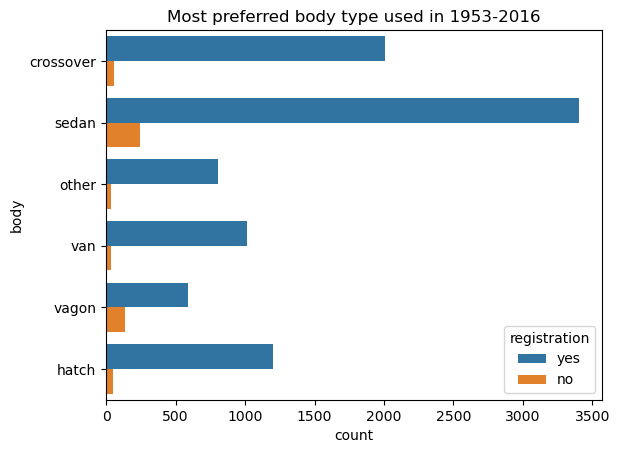

In [29]:
sns.countplot(y='body', data=df, orient='h', hue='registration')
plt.title("Most preferred body type used in 1953-2016")


This shows the car brands having "sedan" type of body having maximum registration/sale over the years. This shows People prefers sedan type of body mostly and hence this information can be use for achieving max sale and to figure out production of units.

Text(0.5, 1.0, 'Most preferred engType used over the years')

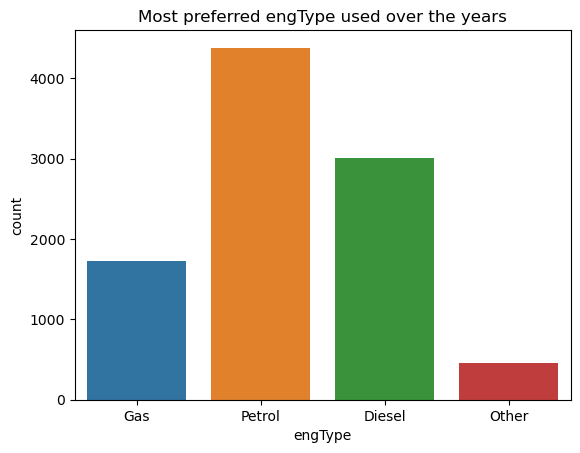

In [30]:
sns.countplot(x='engType', data=df, orient='h')
plt.title("Most preferred engType used over the years")

This shows the engType using petrol having maximum sale over the years. This shows People prefers petrol engine type mostly and hence this information can be use for achieving max sale.

year registration  RegCounts
0  2008          yes       1150
1  2007          yes        915
2  2012          yes        756
3  2011          yes        691
4  2013          yes        642

Text(0.5, 1.0, 'Years group having max sale/registration')

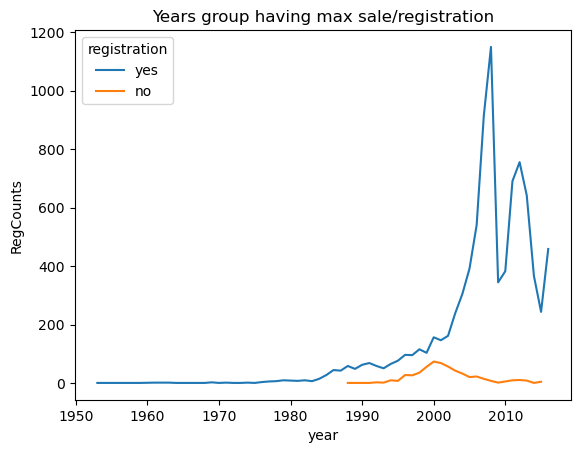

In [31]:
df.sort_values(['car','model','body','mileage','year'])

df1 =df.groupby('year')['registration'].value_counts().sort_values(ascending=False)
df1 = pd.DataFrame(df1)
df1.rename(columns={'registration': 'RegCounts'}, inplace=True)
df1.reset_index(inplace=True)
display(df1.head())
sns.lineplot(data=df1, x='year', y='RegCounts', hue='registration')
#sns.scatterplot(data=df, x='year', y='RegCounts', hue='registrition)
plt.title("Years group having max sale/registration")

* This graph shows in which Year was the highest registrations, and hence shows max sale was done in the Year 2008.This info can be use to start working/research why sale was max in this year.

##### What was the factors affected this sale/registrations

Text(0.5, 1.0, 'year - price lineplot (1950 - 2010)')

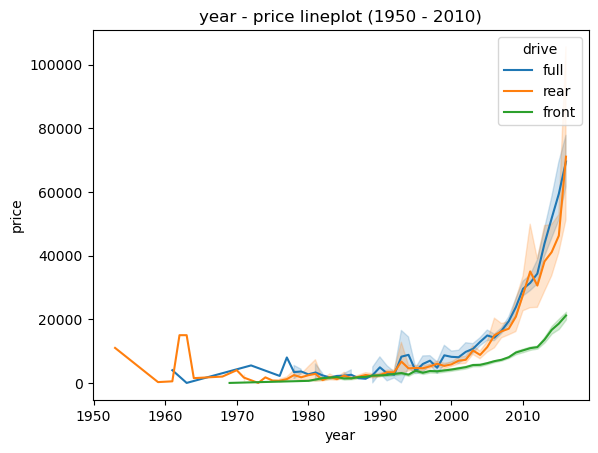

In [32]:
sns.lineplot(data=df, y='price', x='year', hue='drive')
plt.title("year - price lineplot (1950 - 2010)")

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

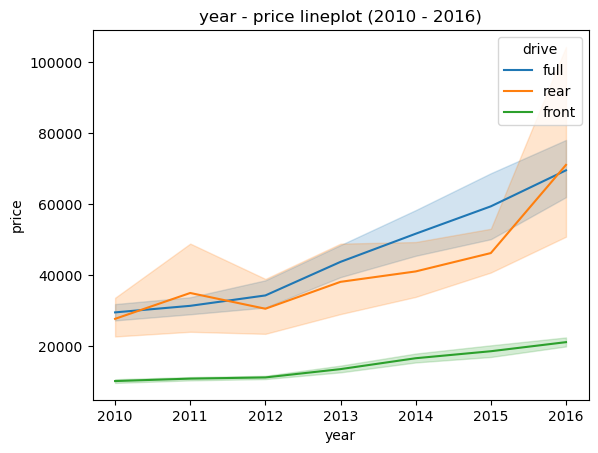

In [33]:
sns.lineplot(data=df[df.year >= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (2010 - 2016)")

The above graphs shows the Price distribution over the years (1953-2016). As the years increase, there has been an increase in price in recent years.

Text(0.5, 1.0, 'mileage - price line Plot')

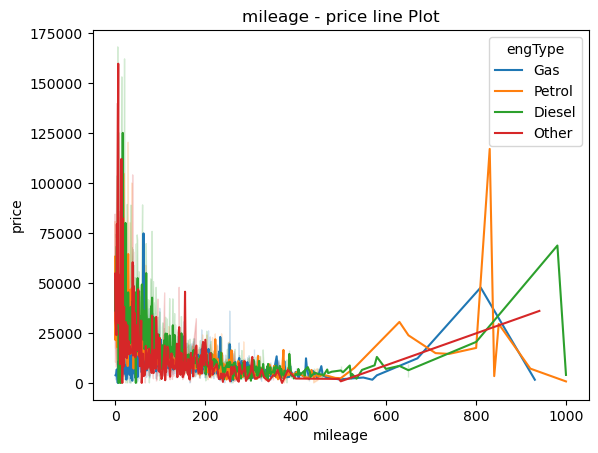

In [34]:
sns.lineplot(x='mileage',y='price',data=df, hue='engType')
plt.title("mileage - price line Plot")

price is varying based on mileage too and this should be consider as a factor for the calculation.

Text(0.5, 1.0, 'Heatmap for Highest correlated features for Car ad dataset')

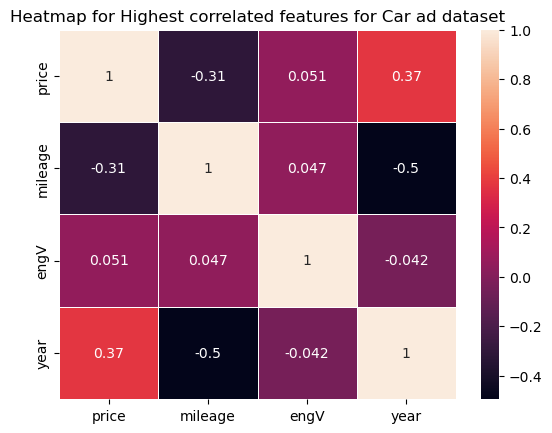

In [35]:
sns.heatmap(df.corr(),annot=True, linewidths=.5)
plt.title("Heatmap for Highest correlated features for Car ad dataset")

Above graph shows which features are most relative/correlated and dependent on each other. Hence it looks price and year are higly correlated to each other and price may change

C:\Users\lavender\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price distribution over the year to engType')

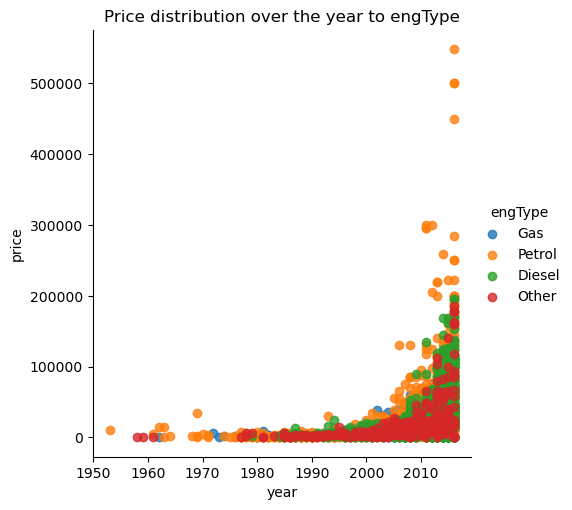

In [36]:
sns.lmplot('year','price', df, fit_reg=False, hue='engType')
plt.title("Price distribution over the year to engType")

The above multivariate graphs shows the Price distribution over the years to engType. As the years increase, this shows there is significant increase in prices of cars models having engine tyep = "Petrol" as compared to "Gas" and "Diesel".

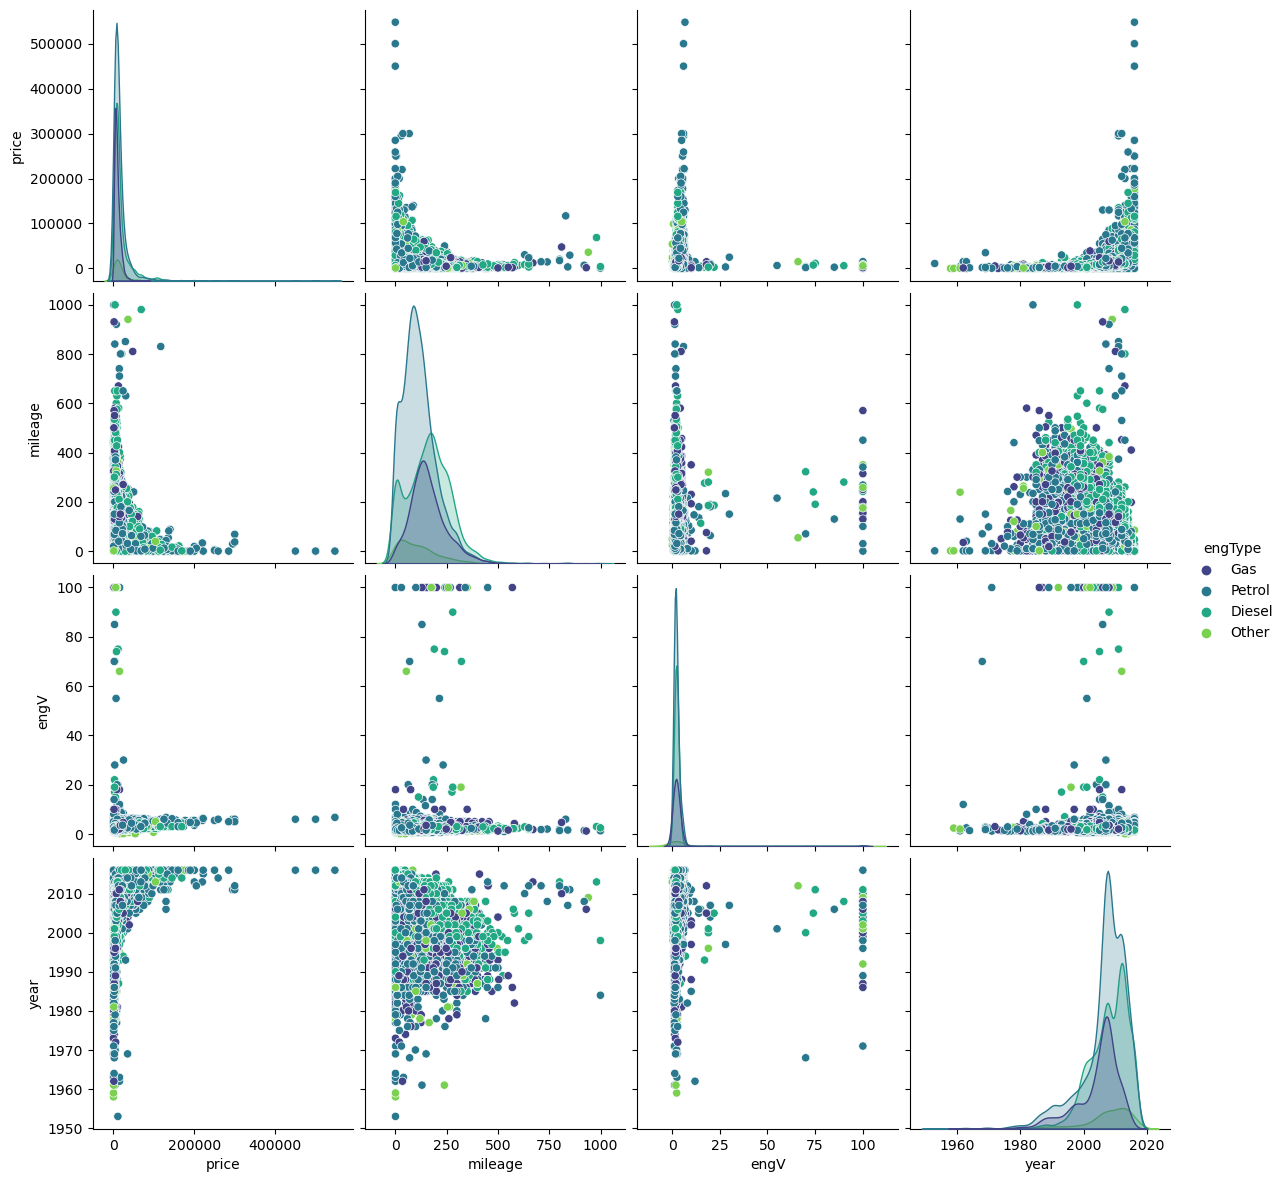

In [37]:
sns.pairplot(df, hue='engType', palette="viridis", height=3)

This pairplot gives the observations which already have been referred from other graphs above : those are

* Price varying based on Year and Mileage
* As Year increases there is increase in Petrol engine type vehicles's prices which also depending on mileage too.



In [38]:
import pandas as pd
import plotly.express as px

# Read the CSV file into a DataFrame
df = pd.read_csv('car_ad.csv', sep=',', encoding='latin-1')

# Create a histogram for 'price' column
hist_price = px.histogram(df, x='price', nbins=20, title='Price Distribution')
hist_price.show()

# Create a histogram for 'year' column
hist_year = px.histogram(df, x='year', nbins=10, title='Year Distribution')
hist_year.show()

# Create a scatter plot for 'mileage' vs 'price'
scatter_mileage_price = px.scatter(df, x='mileage', y='price', title='Mileage vs Price')
scatter_mileage_price.show()

# Create a scatter plot for 'year' vs 'price'
scatter_year_price = px.scatter(df, x='year', y='price', title='Year vs Price')
scatter_year_price.show()
